# Fishers Linear Discriminant Analysis

# Introduction


Linear Discriminant Analysis (LDA) is most commonly used as a dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. But can also be used as a classifier. LDA is a supervised algorithm (requires labeled data). The terms Fisher's linear discriminant, LDA, and Quadratic Linear Discriminant QDA are often used interchangeably, but there are differences (See  [this](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) and [this](https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis) for better disambiguation):

* QDA and LDA are classifier technique. QDA is more general than LDA. Both assuming normality. See 
<a href="intro_lda.ipynb">intro to lda n QDA</a> notebook. 

* Fishers LDA is a dimension reduction technique. **It does NOT make assumptions such as normality**.

In this notebook, we mainly will be talking about Fisher's LDA. We normally use the word LDA to refers to Fishers LDA. For simplicity, the practical aspect of Fishers LDA will be explained by utilizing a 2 class problem and bi-dimensional data.

## What is LDA

In the figure below an labeled dataset contained 2 classes are shown. LDA reduces the dimension of the data by defining a new set of axes ($y$) with lower dimension where the 2 classes are still well separated.

<img src="images/lda_axes_0.png" width="700"/>


###  Small discussion about how LDA works (Can be skipped)

The goal of (LDA) is to find best new set of axis that maximizes the distance between the means of the classes and also minimize overlap between the projected classes (confusion region). 

The figures below describe LDA being applied to a bidimensional dataset containing 2 classes. The dataset is a set of $n$ d-dimensional samples $X = \{x_1, x_2, ..., x_n\}$ already labeled in 2 groups: 
$X^{(k)} = \{ x_1^{(k)},  x_2^{(k)}, ..., x_{n_k}^{(k)} \}$ of size $n_k$ for $k = 1,2$ where $x_i^{(k)}$ is a vector of dimension $d$.

In the figures can be seen the new proposed axis. The left figure, only the distance between the classes were maximized. As a end result there is overlapping region that can noticed in the histogram. The right figure is the LDA's results when not only the distance betwen the classes are maximized but also the overlapping region is minimized

<img src="images/lda_0.png" width="700"/>

In order to do that, Fisher proposed a transformation to be applied on $X$ space that creates a new space $Y$ (**latent space**) that maximize the ratio "scatter between classes/scatter within classes":

The transformations is given by:

$
y_i = v^t x_i
$

And we want to maximize the cost function $J(v)$ (It is scalar).  

$
J(v) = \frac{v^t S_{b} v}{ v^t S_{w}  v} \equiv \frac{\left ( \hat{\mu_2} - \hat{\mu_1} \right )^2}{\hat{S_1}^2 + \hat{S_2}^2}
$

where $S_b$ and $S_w$ will be defined bellow. Maximize $J(v)$ is equivalent to **maximize the distance between the transformed means on the latent space normalized by transformed withing spread matrix**.

* $S_b= \sum_{k=1}^2 n_k (\mu_k - \mu)( \mu_k - \mu )^t$ :  between-class covariance/satter matrix. (Can be understood as measure of between class spread)
    
* $S_{w} =  S_1 + S_2$ : within-class covariance/scatter matrices. (Can be understood as measure of within class spread or the sum of the spread matrix of each class) 


$ \mu_1$ and $ \mu_2$ are the mean of each class. $S_1$ and $S_2$ are the apread matrix of each class. $m$ is the global mean.

$
S_k = \sum_{x_i\in X^{(k)}} ( x_i^{(k)} -  \mu_k) ( x_i^{(k)} - \mu_k)^t  
$

The spread matrix are related to the covariance matrx by the equation:


$
\Sigma_k = \frac{1}{n_k -1}S_k  
$


The total scatter is given by:

$
S_t = \sum_{j=1}^{n}(x_j - \mu)(x_j - \mu)^t 
$

But can be split in terms of the other spread matrices as follow:

$
S_t = \sum_{k=1}^2 \sum_{i=1}^{n_k}(x_i^{(k)} - \mu)(x_i^{(k)} - \mu)^t \equiv  S_w + S_b
$

Can be proved in [here](refs/ea71fbef3b55b69e142897fadf43b3269463.pdf) and [here](refs/Dimensionality2.pdf) that maximize $J(v)$ is equivalent to find the solution of the eigenvalue problem for the matrix:

$
A =  S_{w}^{-1} S_b
$

$
A{v} =  \lambda {v}
$

where:
* $v$ is the eigenvector and define the new axes
* $\lambda$ is the eigenvalue

**The demonstration of some of these equations is at the end of this notebook**.

### Principal Component Analysis vs. Linear Discriminant Analysis

"
Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.
"

<img src="images/lda_1.png" width="700"/>

### Summarizing the LDA approach in 5 steps


1. Compute the d-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices 
    * between-class: measure of dispersion between groups or classes
    * within-class scatter matrix: measure of dispersion in the class or group
3. Compute the eigenvectors $( v_1, v_2, ..., v_d)$ and corresponding eigenvalues $(\lambda_1, \lambda_2,..., \lambda_d)$ for the scatter matrices.
4. Sort the eigenvectors by eigenvalues an keep the k eigenvectors with the k-largest eigenvalues
5. Use the eigenvector matrix to transform the samples onto the new subspace. $Y = XV$
    * $Y$ is nxk matrix
    * $X$ is nxd dimensional matrix. The input data
    * $V$ is dxk dimensional. It is the eigenvector matrix
    
    
$\boldsymbol V = \begin{bmatrix}
 v_1 & v_2 & \cdots & v_k
\end{bmatrix} 
$

where $v_k$ are column vectors of dimension $d$.

In [1]:
import numpy as np
import pandas as pd
import random as rand
import math
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA as sklearnPCA

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

1. load data
3. Summarize data
    * Global covariance matrix
    * Using the formula
    * Using numpy.cov
    * Visualize data

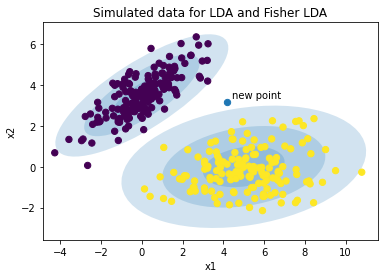

,x,y,label
140,1.217153,4.111403,1
186,5.102498,0.434668,2
284,6.312108,-1.393936,2
25,1.954021,4.374598,1
116,0.571502,3.901530,1


Global/total
 number of samples: 325
 data mean:


array([2.3807, 1.8164])

 data variance:


array([9.104 , 4.4492])

 Covariance matrix:


array([[ 9.1321, -3.918 ],
       [-3.918 ,  4.463 ]])

1st class true parmeters
 number of samples in first group N1: 175

 mean mu1:


[0.0, 3.5]

 Covariance matrix:


[[2.0, 1.1], [1.1, 1.0]]

2nd class true parmeters
 number of samples in first group N1: 150

 mean mu2:


[5.0, 0.0]

 Covariance matrix:


[[4.0, 0.5], [0.5, 1.0]]

In [2]:
%run simulated_lda_data.ipynb

X = df[['x','y']].values
N = X.shape[0]

X1 = df.loc[df.label ==1,['x','y']].values
N1 = X1.shape[0] 

X2 = df.loc[df.label ==2,['x','y']].values
N2 = X2.shape[0] 

df.sample(5).head(5)

total_variance = np.var(X,axis=0)
m = np.mean(X,axis=0)

print('==============================')
print('Global/total')
print(' number of samples: {}'.format(N))
print(' data mean:')
m

print(' data variance:')
total_variance

print(' Covariance matrix:')
S = np.cov(X[:,0],X[:,1])
S

print('1st class true parmeters')
print(' number of samples in first group N1: {}\n'.format(N1))

print(' mean mu1:')
mu1

print(' Covariance matrix:')
Sigma1

print('2nd class true parmeters')
print(' number of samples in first group N1: {}\n'.format(N2))

print(' mean mu2:')
mu2

print(' Covariance matrix:')
Sigma2

### Computing between and within groups spread matrix

1. compute the mean vector of each class
2. compute the spread matrix of each group
3. compute Sw and Sb


In [3]:
# mean of each group
m1 = np.mean(X1,axis=0)
m2 = np.mean(X2,axis=0)

# spread matrix for each group
u1 = np.add(X1,-m1).transpose()
S1 = np.matmul(u1,u1.transpose())

u2 = np.add(X2,-m2).transpose()
S2 = np.matmul(u2,u2.transpose())

# within spread matrix
Sw = np.add(S1,S2)

# between spread matrix
dm1 = (np.add(m1,-m))
dm1 = dm1[np.newaxis].transpose()

dm2 = (np.add(m2,-m))
dm2 = dm2[np.newaxis].transpose()

Sb = np.add(N1*np.dot(dm1, dm1.transpose()),N2*np.dot(dm2, dm2.transpose()))

print('Within spread matrix:')
Sw

print('Between spread matrix:')
Sb

Within spread matrix:


array([[878.6889, 242.9989],
       [242.9989, 346.3167]])

Between spread matrix:


array([[ 2080.1242, -1512.4433],
       [-1512.4433,  1099.6866]])

### Solving the eigenvalue and eigenvector 

* Inverting $S_w$ and check the results


In [4]:
Sw_inv = np.linalg.inv(Sw)
I = np.matmul(Sw,Sw_inv)

print('Sw:')
Sw

print('Inverted Sw:')
Sw_inv

print('Identity matrix')
I

Sw:


array([[878.6889, 242.9989],
       [242.9989, 346.3167]])

Inverted Sw:


array([[ 0.0014, -0.001 ],
       [-0.001 ,  0.0036]])

Identity matrix


array([[ 1.0000e+00, -2.2296e-17],
       [-3.0937e-17,  1.0000e+00]])

* Compute matrix $A$ and solve the system

$V$ eigenvector matrix is a matrix with stacked column eigenvectors

$\boldsymbol V = \begin{bmatrix}
 v_1 & v_2
\end{bmatrix} \equiv \begin{bmatrix}
 v_{1x_1} & v_{2x_1} \\ 
 v_{1x_2} & v_{2x_2}
\end{bmatrix}
$

In [5]:
A = np.matmul(Sw_inv, Sb)

eigen_values, V = np.linalg.eig(A)

print('A:')
A

print('eigen_values:')
eigen_values
print('eigen_vectors matrix:')
V

print('eigen_vectors :')
v1 = V[:,0]
v2 = V[:,1]

v1
v2

A:


array([[ 4.4358, -3.2252],
       [-7.4797,  5.4384]])

eigen_values:


array([0.    , 9.8742])

eigen_vectors matrix:


array([[-0.5881,  0.5101],
       [-0.8088, -0.8601]])

eigen_vectors :


array([-0.5881, -0.8088])

array([ 0.5101, -0.8601])

The eigenvector with the largest eigenvalue is v2. So we keep v2 and remove v1.

* Checking $Av_2=\lambda_2 v_2$ is true
* Comparing with scikitlearn (checking)

In [7]:
print('checking')
A.dot(v2)
eigen_values[1]*v2

np.testing.assert_array_almost_equal(A.dot(v2),
                                         eigen_values[1] *v2,
                                         decimal=6, err_msg='', verbose=True)

print('comparing with scilit learn')
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, labels).transform(X)

v3 = lda.scalings_

print('eigenvectors')

v3.T
v2

print('dot product between scikit learn and our eigenvector')
# 1 means they are aligned
v2.dot(v3)/np.linalg.norm(v3)

checking


array([ 5.0367, -8.493 ])

array([ 5.0367, -8.493 ])

comparing with scilit learn
eigenvectors


array([[ 0.5563, -0.938 ]])

array([ 0.5101, -0.8601])

dot product between scikit learn and our eigenvector


array([1.])

both the scikitlearn and my eigenvector have almost the same direction. The difference might be related to different methodology to solve the eigenvalue eigenvector problem and numerical precission. The new axis $y$ can be seen in the graph bellow

* Visualize new axes and data

Text(2.040363235907021, -3.4404822141029925, 'y')

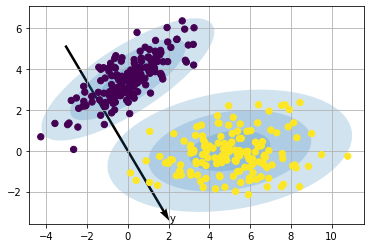

In [8]:
## plot the input data and the new set of axes
ax = plt.gca()
plot_gmm(initial_guess, X, label=labels, ax=ax)

p = -6.0*v2
v2l = 10.0*v2 

ax.quiver(p[0],p[1],v2l[0],v2l[1], units = 'xy',scale=1)
ax.text(v2l[0] + p[0], v2l[1] + p[1], 'y')
ax.grid()

* Comparing with PCA 

(325, 1)

Comparing eigenvectors


array([ 0.5101, -0.8601])

array([ 0.8694, -0.494 ])

dot product


0.8684193279858181

Show me dont tell me


Text(1.5812815078279419, -2.666373715929819, 'v2')

Text(2.6952847996330864, -1.5314828921234591, 'vpca')

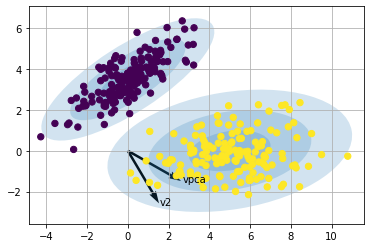

In [14]:
## PCA See no need to use labels
pca = sklearnPCA(n_components=1)

Y = pca.fit_transform(X)

Y.shape

vpca = pca.components_[0]

print('Comparing eigenvectors')
v2
vpca

print('dot product')
vpca.dot(v2.T)

print('Show me dont tell me')
ax = plt.gca()
plot_gmm(initial_guess, X, label=labels, ax=ax)


ax.quiver(0,0,3*v2[0],3*v2[1], units = 'xy',scale=1)
ax.quiver(0,0,3*vpca[0],3*vpca[1], units = 'xy',scale=1)
ax.text(3.1*v2[0], 3.1*v2[1], 'v2')
ax.text(3.1*vpca[0], 3.1*vpca[1], 'vpca')
ax.grid()

As we explained before PCA leads for different axes and projections.

### Transform the data to the new set of axes

Now in this section we are going to use eigenvector matrix in order to project the input dataset in $v_2$, the new subspace

(array([ 1.,  8., 10., 24., 28., 47., 32., 16.,  6.,  3.]),
 array([-4.7632, -4.4282, -4.0932, -3.7582, -3.4232, -3.0882, -2.7533,
        -2.4183, -2.0833, -1.7483, -1.4133]),
 <a list of 10 Patch objects>)

(array([ 1.,  6., 18., 25., 30., 24., 23., 11.,  8.,  4.]),
 array([-0.2677,  0.3403,  0.9484,  1.5565,  2.1645,  2.7726,  3.3807,
         3.9888,  4.5968,  5.2049,  5.813 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'y')

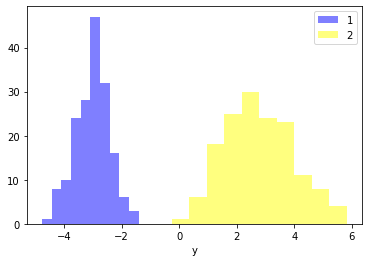

In [15]:
# tranform each class
Y1 = np.matmul(X1,v2)
Y2 = np.matmul(X2,v2)

## show me dont tell me
ax = plt.gca()
ax.hist(Y1,color='blue', alpha=0.5, label='1')
ax.hist(Y2,color='yellow', alpha=0.5, label='2')
plt.legend(loc='upper right')
plt.xlabel('y')

Y = np.matmul(X,v2)

So the classes are well separated using only one axis, this make easy to set a threshold to split the classes.

## Verification of the equations on the first sections

For the verification of the formulas cited in the firsts sections (See: [Small discussion about how LDA works (Can be skipped)]()), we are going to compute all matrix: $\hat{\Sigma_1}$, $\hat{\Sigma_2}$ and $S_t$ and compare with the global covariance matrix of the data (the spread of the data conserves) $\hat{\Sigma}$. Also because we generated the data using two multivariate Gaussians, we know the true values of the parameters $\Sigma_1$ and $\Sigma_2$ and we can compare with our estimations of this parameters.

### STARTED: Estimating the covariances Matrix

Computing $\hat{\Sigma_k}$ and comparing with the true values $\Sigma_k$


In [18]:
Sigma1_hat =  S1/(N1 - 1)

print('Class: 1')

print(' Covariance matrix estimation Sigma_1: ')
Sigma1_hat
print(' Covariance matrix expected Sigma_1:')
Sigma1

Sigma2_hat = S2/(N2 - 1)

print('Class: 2')
print(' Covariance matrix estimation Sigma_2:')
Sigma2_hat

print(' Covariance matrix expected Sigma_2:')
Sigma2

Class: 1
 Covariance matrix estimation Sigma_1: 


array([[1.8321, 1.1163],
       [1.1163, 1.1313]])

 Covariance matrix expected Sigma_1:


[[2.0, 1.1], [1.1, 1.0]]

Class: 2
 Covariance matrix estimation Sigma_2:


array([[3.7577, 0.3272],
       [0.3272, 1.0031]])

 Covariance matrix expected Sigma_2:


[[4.0, 0.5], [0.5, 1.0]]

the difference is due to the small sample size of each group.

In [19]:
u = np.add(X,-m).transpose()
S_hat = np.matmul(u,u.transpose())

Sigma_hat = S_hat/(N-1)

print(' Spread matrix Sw:')
Sw

print(' Spread matrix Sb:')
Sb

print(' Total spread matrix S_hat:')
S_hat

print(' Global covariance matrix Sigma_hat:')
Sigma_hat

print(' Covariance matrix expected Sigma:')
S

 Spread matrix Sw:


array([[878.6889, 242.9989],
       [242.9989, 346.3167]])

 Spread matrix Sb:


array([[ 2080.1242, -1512.4433],
       [-1512.4433,  1099.6866]])

 Total spread matrix S_hat:


array([[ 2958.8131, -1269.4444],
       [-1269.4444,  1446.0033]])

 Global covariance matrix Sigma_hat:


array([[ 9.1321, -3.918 ],
       [-3.918 ,  4.463 ]])

 Covariance matrix expected Sigma:


array([[ 9.1321, -3.918 ],
       [-3.918 ,  4.463 ]])

* **TODO**: Double shecking $S_b$ equations are equivalents


It is not equivalent !? Review this later


In [ ]:
# mean of each group
m1 = np.mean(X1,axis=0)
m2 = np.mean(X2,axis=0)

m1
m2

# between spread matrix
dm1 = (np.add(m1,-m))
dm1 = dm1[np.newaxis].transpose()

dm2 = (np.add(m2,-m))
dm2 = dm2[np.newaxis].transpose()

Sb = np.add(N1*np.dot(dm1, dm1.transpose()),N2*np.dot(dm2, dm2.transpose()))


du = m2 - m1

np.dot(du, du.transpose())

Sb

* Comparing matrix $S_t$ and $\hat{S}$

In [20]:
St = Sw + Sb
print(' Total spread matrix S_t:')
St

print(' Total spread matrix S_hat:')
S_hat

print(' (S_hat - St)/S_hat:')
(S_hat - St)/S_hat

 Total spread matrix S_t:


array([[ 2958.8131, -1269.4444],
       [-1269.4444,  1446.0033]])

 Total spread matrix S_hat:


array([[ 2958.8131, -1269.4444],
       [-1269.4444,  1446.0033]])

 (S_hat - St)/S_hat:


array([[ 3.0738e-16, -1.7911e-16],
       [-1.7911e-16, -6.2897e-16]])

The largest difference between $\hat{S}$ and $S_t$ is 6%.

### Checking eigenvelaue and eigenvector equations

checking eigenvalues and eigenvectros properties

1. eigenvectors are normalized
2. A is not **symetric** ($A \neq A^t$), their eigenvectors are **NOT orthogonal**
2. $tr(A) = \sum \lambda_i$ (sum of all eigenvalues)


In [ ]:
print('A and A transpose')
A
A.T

print('check eigenvectors')
# Checking the norms
np.linalg.norm(v1)
np.linalg.norm(v2)

# If I was reducing form 3s to 2d than at leats 2 eigenvetors are orthogornal
print('Since A is NOt symetric their eigenvectors are not orthogonal')

v1.dot(v2.T)

print('check eigenvalues')

# checking eigenvalues
print('cheking trace(A) and sum of all eigenvalues')
np.sum(eigen_values)
np.trace(A)

assert np.abs(np.sum(eigen_values) - np.trace(A)) < 0.1

### TODO: Checking J is maximized

TODO


heatmap plot shoinf v that maximize J and others v that does not maximize


In [ ]:
## my code here

## Comparing LDA and PCA with scikit learn and iris dataset

ref: https://sebastianraschka.com/Articles/2014_python_lda.html#checking-the-eigenvector-eigenvalue-calculation

### Iris database


The three classes in the Iris dataset:

* Iris-setosa (n=50)
* Iris-versicolor (n=50)
* Iris-virginica (n=50)

The four features of the Iris dataset:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

<img src="images/iris_petal_sepal.png" width="200" align="left"/>

In [ ]:


# shameless adapt from: 
# https://sebastianraschka.com/Articles/2014_python_lda.html#checking-the-eigenvector-eigenvalue-calculation

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}


def plot_data(X, title):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

    for ax,cnt in zip(axes.ravel(), range(4)):  

        # set bin sizes
        min_b = math.floor(np.min(X[:,cnt]))
        max_b = math.ceil(np.max(X[:,cnt]))
        bins = np.linspace(min_b, max_b, 25)

        # plottling the histograms
        for lab,col in zip(range(0,3), ('blue', 'red', 'green')):
            ax.hist(X[y==lab, cnt],
                   color=col,
                   label='%s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
        ylims = ax.get_ylim()

        # plot annotation
        leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
        leg.get_frame().set_alpha(0.5)
        ax.set_ylim([0, max(ylims)+2])
        ax.set_xlabel(feature_dict[cnt])
        ax.set_title('Iris histogram #%s' %str(cnt+1))

        # hide axis ticks
        ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

        # remove axis spines
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)    

    axes[0][0].set_ylabel('count')
    axes[1][0].set_ylabel('count')

    fig.tight_layout()       

    plt.show()

def plot_pca(X,title):

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                y=X[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper left', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()
    
def plot_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [ ]:
# Load the Iris flower dataset:
iris = datasets.load_iris()
X_iris = iris.data
y = iris.target

X_iris.shape
np.unique(y, axis=0)

plot_data(X_iris, title='Scikit learn iris dataset')

In [ ]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_iris, y).transform(X_iris)

## PCA See no need to use labels
pca = sklearnPCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

In [ ]:
from scipy import stats
print('Original number of features:', X_iris.shape[1])
print('LDA:')
print(' Explaned variance ratio: {}'.format(lda.explained_variance_ratio_))
print(' Reduced number of features:', X_lda.shape[1])
stats.describe(X_lda)


print('PCA:')
print(' Explaned variance ratio: {}'.format(pca.explained_variance_ratio_))
print(' Reduced number of features:', X_pca.shape[1])
stats.describe(X_pca)

In [ ]:
plot_pca(X_pca,title='PCA via scikit-learn')
plot_lda(X_lda, title='LDA via scikit-learn')

LDA gave us a better separated classes: Versicolor and Virginica.

## Math demonstration of the formulas


See:  [here](refs/ea71fbef3b55b69e142897fadf43b3269463.pdf) and [here](refs/Dimensionality2.pdf) 



### Deriving the total spread matrix 


Demonstartion of: 

$
S_t = S_w + S_b
$


<img src="images/deriving_total_spread_matrix_page_1.jpg" width="700"/>

---------------

<img src="images/deriving_total_spread_matrix_page_2.jpg" width="700"/>

___________________

<img src="images/deriving_total_spread_matrix_page_3.jpg" width="700"/>

-------------------

### TODO: Demonstartinve J of v equations

$
J(v) = \frac{v^t S_{b} v}{ v^t S_{w}  v} \equiv \frac{\hat{\mu_1} - \hat{\mu_2}}{\hat{S_1}^2 + \hat{S_2}^2}
$

**TODO**:
    
It is still not clear for me the between spread matrix

Are the same definitions equivalents? How can I prove that. It holds only if all class have the same number of samples $n_k$?

$
S_b= \sum_{k=1}^2 n_k (\mu_k - \mu)( \mu_k - \mu )^t
$

$
S_b = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^t
$


Right now, assume both equations are equivalents we can show that for 2 class example:

<img src="images/j_of_v_derivation.jpg" width="700"/>

------

### Showing that maximize the cost function is an eigen value and vector problem


$
\frac{d}{dv}J(v) = \frac{d}{dv} \left ( \frac{v^t S_{b} v}{ v^t S_{w}  v} \right ) \equiv 0
$


Is the same as solve the eigen value eigen vector problem:

$
A =  S_{w}^{-1} S_b
$

$
A{v} =  \lambda {v}
$


See this [Matrux Calculus](refs/MatrixCalculus.pdf) refrence.|

<img src="images/j_of_page_1.jpg" width="700"/>

--------

<img src="images/j_of_v_page_2.jpg" width="700"/>

